## Table of Contents

1. [Problem Statement](#section1)
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
2. [Load the Packages and Data](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Which type of cars are sold maximum?](#section401)<br/>
    - 4.2 [What is the co-relation between price and mileage?](#section402)<br/>
    - 4.3 [How many cars are registered?](#section403)<br/>
    - 4.4 [Price distribution between registered and non-registered cars.](#section404)<br/>
    - 4.5 [What is the car price distribution based on Engine Value?](#section405)<br/>
    - 4.6 [Which Engine Type of cars users preferred maximum?](#section406)<br/>
    - 4.7 [Establish corelation between all features using heatmap.](#section407)<br/>
    - 4.8 [Distribution of Price](#section408)<br/>    
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

"This is dataset of the cars sale in UKraine , which have about 9.5k records so use this data set for the the following EDA questions"
Is it a sample? If yes, was it properly sampled?


<a id=section2></a> 
### 2. Load the packages and data

__Importing Packages__

In [126]:
import numpy as np                          # Implemennts milti-dimensional array and matrices
import pandas as pd                         # For data manipulation and analysis
import matplotlib.pyplot as plt             # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                       # Provides a high level interface for drawing attractive and informative statistical graphics

__Loading Dataset__

In [128]:
df = pd.read_csv('CarSaleAzimy.csv')
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Chery,11111.295,crossover,1,1.6,Petrol,yes,2016,Tiggo,front
1,Mitsubishi,25342.200,other,1,2.5,Diesel,yes,2016,L 200,full
2,Chevrolet,10577.775,crossover,1,1.7,Petrol,yes,2015,Niva,full
3,Peugeot,16042.650,hatch,1,1.6,Diesel,yes,2015,308,front
4,Mercedes-Benz,4700.000,sedan,1,1.8,Petrol,yes,1996,C-Class,rear


<a id=section3></a>

## 3. Data Profiling

In [130]:
from ydata_profiling import ProfileReport  # this library is used for pandas-profiling

In [132]:
profile = ProfileReport(df, title="Car Sale Dataset profiling Report")


In [134]:
profile.to_notebook_iframe()    # it shows the report inside the Jupyter Notebook



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [136]:
# save in html file format
profile.to_file("Car Sels Profiling Report Azimy.html")


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<a id=section301></a>

### 3.1 Understanding the Dataset

In [138]:
 # find the number of rows and comlumns of the Data Frame
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 9576
Number of columns: 10


In [140]:
# print all the columns in the data set 
print(df.columns)

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')


### 3.2 Describe the Dataset

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9576 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.3+ KB


In [144]:
df.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9576.000000,9576.000000
mean,15633.317316,140.473058,2.609065,2006.605994
std,24106.523436,96.883741,5.795822,7.067924
min,0.000000,1.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,1000.000000,99.990000,2016.000000


In [146]:
df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

### Describe the dataset with all attributes

In [148]:
description = df.describe(include='all')
print(description)

               car          price   body      mileage         engV engType  \
count         9576    9576.000000   9576  9576.000000  9576.000000    9576   
unique          87            NaN      6          NaN          NaN       4   
top     Volkswagen            NaN  sedan          NaN          NaN  Petrol   
freq           936            NaN   3646          NaN          NaN    4379   
mean           NaN   15633.317316    NaN   140.473058     2.609065     NaN   
std            NaN   24106.523436    NaN    96.883741     5.795822     NaN   
min            NaN       0.000000    NaN     1.000000     0.100000     NaN   
25%            NaN    4999.000000    NaN    70.000000     1.600000     NaN   
50%            NaN    9200.000000    NaN   128.000000     2.000000     NaN   
75%            NaN   16700.000000    NaN   194.000000     2.500000     NaN   
max            NaN  547800.000000    NaN  1000.000000    99.990000     NaN   

       registration         year    model  drive  
count       

### sort the data set by the price in descending order 

In [150]:
    
sorted_df = df.sort_values(by='price', ascending=False)

print(sorted_df)

                car     price       body  mileage  engV engType registration  \
1200        Bentley  547800.0      sedan       35  6.75  Petrol          yes   
1008        Bentley  499999.0  crossover       35  6.00  Petrol          yes   
1215        Bentley  499999.0  crossover       35  6.00  Petrol          yes   
1091        Bentley  449999.0  crossover       35  6.00  Petrol          yes   
1416  Mercedes-Benz  300000.0      other       37  5.00  Petrol          yes   
...             ...       ...        ...      ...   ...     ...          ...   
943             BMW       0.0  crossover       35  3.00  Diesel          yes   
565   Mercedes-Benz       0.0      sedan       20  3.00  Diesel          yes   
1706        Peugeot       0.0      other       48  1.60  Diesel          yes   
4930         Nissan       0.0  crossover      130  2.00  Petrol          yes   
938            Audi       0.0  crossover       35  3.00  Diesel          yes   

      year          model  drive  
1200

 ### import the library which Provides a high level interface for drawing attractive and informative statistical graphics

In [152]:

import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
# show the first 5 records of the data set
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Chery,11111.295,crossover,1,1.6,Petrol,yes,2016,Tiggo,front
1,Mitsubishi,25342.200,other,1,2.5,Diesel,yes,2016,L 200,full
2,Chevrolet,10577.775,crossover,1,1.7,Petrol,yes,2015,Niva,full
3,Peugeot,16042.650,hatch,1,1.6,Diesel,yes,2015,308,front
4,Mercedes-Benz,4700.000,sedan,1,1.8,Petrol,yes,1996,C-Class,rear


### Information about the Dataset

In [156]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9576 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.3+ KB


### shwo the null values in each attributes or column in the data set

In [158]:
 
null_values = df.isnull().sum()

print(null_values)

car               0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64


In [160]:
df['drive'].isnull().sum()

511

From the above output we can see that __engV__ and __drive__ columns contains __maximum null values__. We will see how to deal with them.

1. Fill missing.
2. Sort()according to price (Asending)
3. Group via drive 
4. Dummy

#### 1. Filling the null values of drive


<a id=section302></a>

In [162]:

DataFramToFilling = df

df['drive']=df['drive'].fillna('front')

df['drive'].isnull().sum()


0

#### 2. Sort()according to price (Asending)

In [164]:
df = df.sort_values(by='price', ascending=True)

print(df)

                car     price       body  mileage  engV engType registration  \
5236     Mitsubishi       0.0        van      138  2.40  Petrol          yes   
2291     Volkswagen       0.0      other       67  1.80   Other          yes   
366   Mercedes-Benz       0.0      sedan        9  3.00  Diesel          yes   
3220          Mazda       0.0      other       90  1.80   Other          yes   
5205        Renault       0.0      vagon      137  1.90  Diesel          yes   
...             ...       ...        ...      ...   ...     ...          ...   
2333  Mercedes-Benz  300000.0      sedan       68  6.00  Petrol          yes   
1091        Bentley  449999.0  crossover       35  6.00  Petrol          yes   
1008        Bentley  499999.0  crossover       35  6.00  Petrol          yes   
1215        Bentley  499999.0  crossover       35  6.00  Petrol          yes   
1200        Bentley  547800.0      sedan       35  6.75  Petrol          yes   

      year         model  drive  
5236 

#### 3. Group via driv

In [166]:

# Group by price and perform some aggregation, e.g., count or mean
#grouped = df.groupby('price').agg({'car': 'count'})  # Replace 'your_column' as needed

grouped = df.groupby('drive') 
print(grouped)

In [168]:
grouped.count()

,car,price,body,mileage,engV,engType,registration,year,model
drive,,,,,,,,,
front,5699,5699,5699,5699,5699,5699,5699,5699,5699
full,2500,2500,2500,2500,2500,2500,2500,2500,2500
rear,1377,1377,1377,1377,1377,1377,1377,1377,1377


In [170]:
grouped.min()

,car,price,body,mileage,engV,engType,registration,year,model
drive,,,,,,,,,
front,Acura,0.0,crossover,1,0.11,Diesel,no,1958,1 Series
full,Acura,0.0,crossover,1,0.70,Diesel,no,1961,10
rear,Alfa Romeo,0.0,crossover,1,0.10,Diesel,no,1953,116


In [172]:
grouped.max()

,car,price,body,mileage,engV,engType,registration,year,model
drive,,,,,,,,,
front,�UAZ,300000.0,van,999,99.99,Petrol,yes,2016,������������
full,�UAZ,499999.0,van,980,99.99,Petrol,yes,2016,�������
rear,ZAZ,547800.0,van,1000,99.99,Petrol,yes,2016,Z4


#### 4. Dummy 

In [208]:
# I applied dummy to ['drive'] columns
#New_DataFrameForDummy = df
df = pd.get_dummies(df, columns=['drive'])
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive_front,drive_full,drive_rear
67,GAZ,259.350,sedan,1,2.4,Other,yes,1959,21,False,False,True
3597,Moskvich-AZLK,280.000,sedan,99,1.5,Petrol,yes,1976,2140,False,False,True
3686,Moskvich-AZLK,350.000,sedan,100,1.8,Other,yes,1985,2140,True,False,False
265,ZAZ,370.500,sedan,3,1.1,Petrol,yes,1989,968,False,False,True
64,VAZ,389.025,vagon,1,1.3,Petrol,yes,1983,2102,True,False,False


### 3.3 Preprocessing

- Dealing with duplicate rows<br/>
    - Find number of duplicate rows in the dataset.
    - Print the duplicate entries and analyze.
    - Drop the duplicate entries from the dataset.

#### 3.3.1 Find number of duplicate rows in the dataset.

In [210]:
# Find and count duplicate rows
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()

print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


#### 3.3.2 Print the duplicate entries and analyze

In [212]:
# Find and print duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [car, price, body, mileage, engV, engType, registration, year, model, drive_front, drive_full, drive_rear]
Index: []


#### 3.3.3 Drop the duplicate entries from the dataset.

In [214]:
df.drop_duplicates(inplace=True)
print("Number of Duplicated rows ", df.duplicated().sum())

Number of Duplicated rows  0


- Dealing with missing values<br/>
    - __511__ missing entries of __drive.__ Replace it with __most common__ value of drive from the same Car and body group of cars.
    - Drop entries having __price__ is 0 or less than 0.

__511__ missing values of __drive__ has been replaced however.

# Dropping entries with __price <= 0__ .

In [216]:
df.drop(df[df['price'] <= 0].index, inplace=True)

df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive_front,drive_full,drive_rear
67,GAZ,259.350,sedan,1,2.4,Other,yes,1959,21,False,False,True
3597,Moskvich-AZLK,280.000,sedan,99,1.5,Petrol,yes,1976,2140,False,False,True
3686,Moskvich-AZLK,350.000,sedan,100,1.8,Other,yes,1985,2140,True,False,False
265,ZAZ,370.500,sedan,3,1.1,Petrol,yes,1989,968,False,False,True
64,VAZ,389.025,vagon,1,1.3,Petrol,yes,1983,2102,True,False,False


<a id=section304></a>

The data are processed now. The dataset doesnot contain missing and zero values.

<a id=section4></a>

### 4. Questions

<a id=section401></a>

### 4.1 Which type of cars are sold maximum?

In [218]:
# Count the occurrences of each car type
car_type_counts = df['car'].value_counts()

# Get the type of car sold the most
most_sold_car_type = car_type_counts.idxmax()
most_sold_count = car_type_counts.max()

print(f"The type of car sold the most is '{most_sold_car_type}' with {most_sold_count} sales.")

The type of car sold the most is 'Volkswagen' with 899 sales.


- Using Countplot

C:\Users\Shakoor\AppData\Local\Temp\ipykernel_17344\360714874.py:17: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  plt.tight_layout()  # Adjusts layout to ensure everything fits without overlap
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


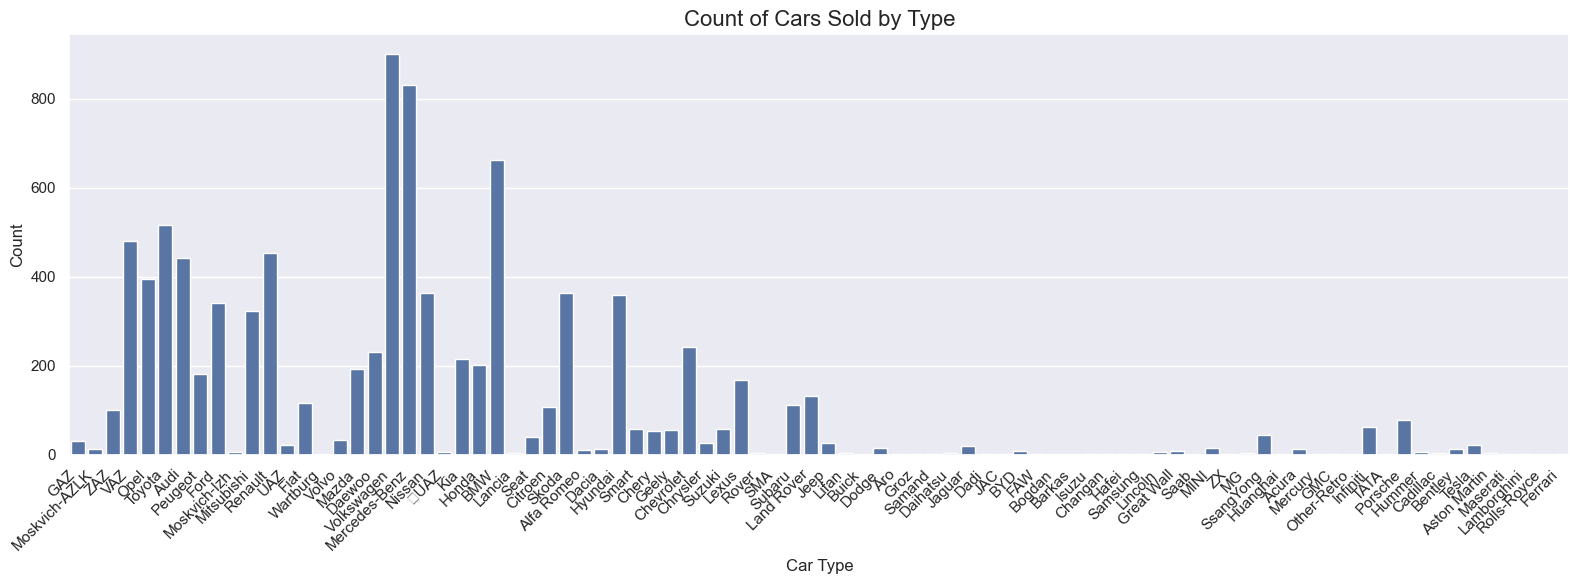

In [186]:
%matplotlib inline
# Create a countplot for 'Car Type'
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))  # Set the figure size

sns.countplot(x='car', data=df)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and align to the right

# Add a title and labels
plt.title('Count of Cars Sold by Type', fontsize=16)
plt.xlabel('Car Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjusts layout to ensure everything fits without overlap
plt.show()

#### Top 3 cars that sold most

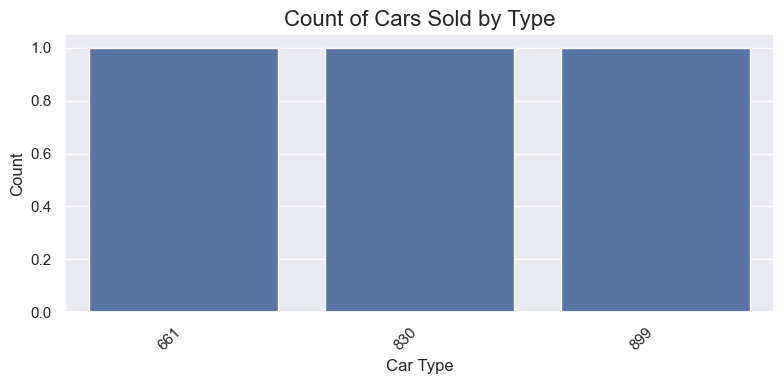

In [188]:
# Count the occurrences of each car type
car_type_counts = df['car'].value_counts().head(3)

# Create a countplot for 'Car Type'
sns.set(style="darkgrid")
plt.figure(figsize=(8, 4))  # Set the figure size

sns.countplot(x=car_type_counts)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and align to the right

# Add a title and labels
plt.title('Count of Cars Sold by Type', fontsize=16)
plt.xlabel('Car Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.tight_layout()  # Adjusts layout to ensure everything fits without overlap
plt.show()

<a id=section402></a>

### 4.2 What is the co-relation between price and mileage?

Correlation between Price and Mileage: -0.31


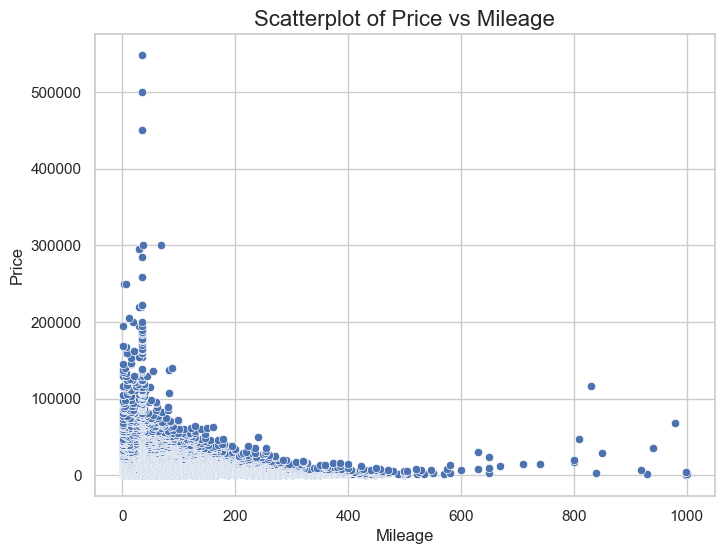

In [220]:
# Calculate the correlation between Price and Mileage
correlation = df['price'].corr(df['mileage'])

print(f"Correlation between Price and Mileage: {correlation:.2f}")

# Visualize the relationship between Price and Mileage
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a scatterplot to show the relationship between Price and Mileage
sns.scatterplot(x='mileage', y='price', data=df)

# Add a title and labels
plt.title('Scatterplot of Price vs Mileage', fontsize=16)
plt.xlabel('Mileage', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

#### It means that  a  negative correlation exist (as price is increases, milage decreases).

### 4.3. How many cars are registered?

In [192]:
# Count the number of cars that are registered (i.e., 'Yes' in the 'Registration' column)

num_registered_cars = df[df['registration'] == 'yes'].shape[0]

print(f"Number of registered cars: {num_registered_cars}")

Number of registered cars: 8668


### 4.4. Price distribution between registered and non-registered cars.

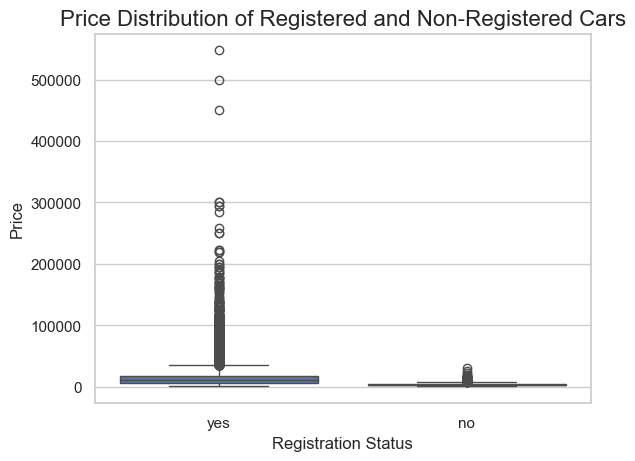

In [194]:
# Boxplot to compare Price distribution between registered ('Yes') and non-registered ('No') cars
sns.boxplot(x='registration', y='price', data=df)

# Add a title and labels
plt.title('Price Distribution of Registered and Non-Registered Cars', fontsize=16)
plt.xlabel('Registration Status', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the plot
plt.show()

### 4.5. What is the car price distribution based on Engine Value?

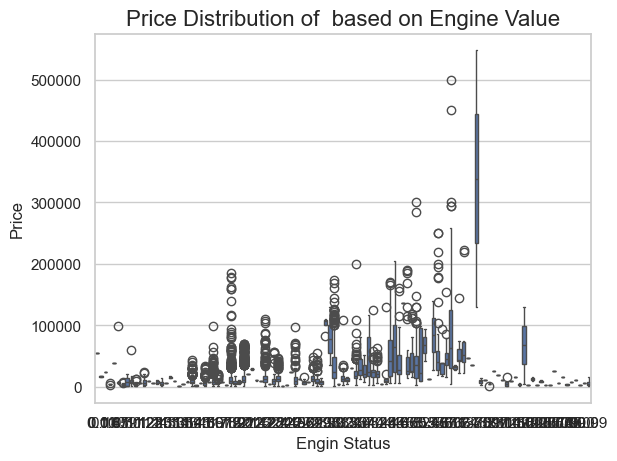

In [196]:
# Boxplot to compare Price distribution between registered ('Yes') and non-registered ('No') cars
sns.boxplot(x='engV', y='price', data=df)

# Add a title and labels
plt.title('Price Distribution of  based on Engine Value', fontsize=16)
plt.xlabel('Engin Status', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the plot
plt.show()

<a id=section406></a>

### 4.6. Which engine type of cars users preferred maximum?

In [198]:
# Count the number of occurrences of each engine type and display the most preferred one
preferred_engine_type = df['engV'].value_counts().head(1)

print("Most preferred engine type:")
print(preferred_engine_type)

Most preferred engine type:
engV
2.0    1495
Name: count, dtype: int64


<Axes: xlabel='engV', ylabel='count'>

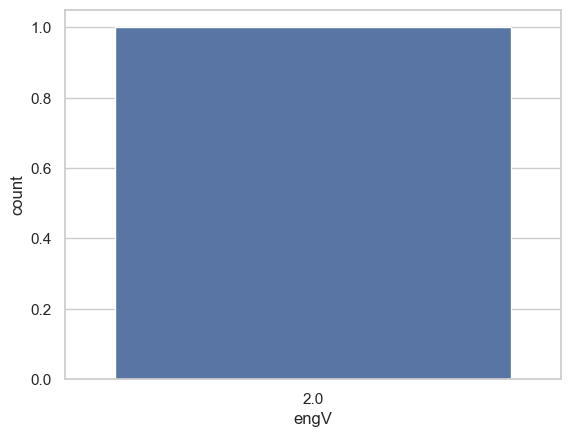

In [200]:
sns.countplot(df['engV'].value_counts().head(1))

Petrol cars are more preferred and followed by Diesel, Gas and others.

<a id=section407></a>

### 4.7 Establish coorelation between all the features using heatmap.

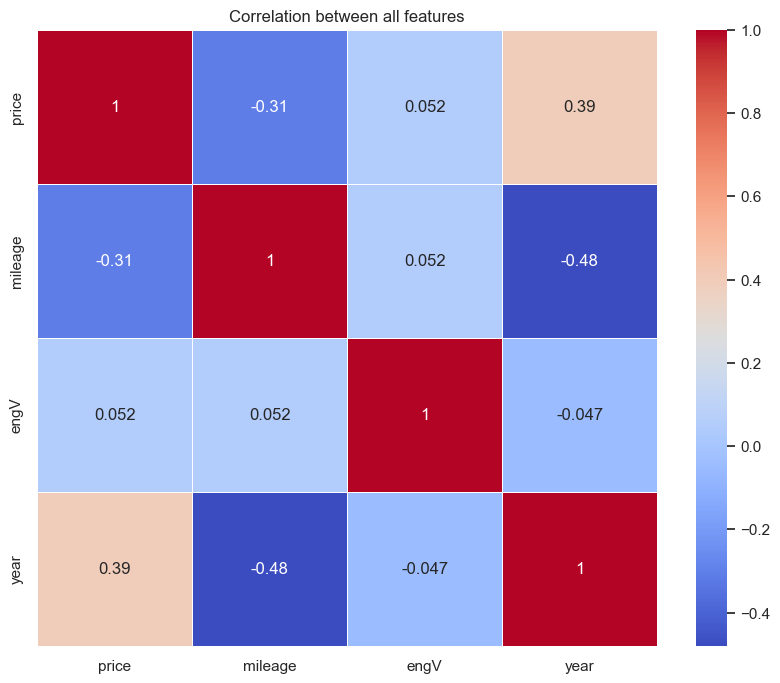

In [222]:

# This will drop all non-numeric columns from the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])


# Step 3: Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Step 4: Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between all features')
# Display the plot
plt.show()


# Car Features Correlation Analysis

## Features
- **Price**: The dependent variable, likely representing the sale price of the cars.
- **Mileage**: Represents the distance a car has traveled, usually measured in miles or kilometers.
- **EngV (Engine Volume)**: Represents the engine size, typically measured in liters.
- **Year**: The year the car was manufactured.

## Correlation Values
- **Correlation Coefficient**: Ranges from -1 to 1.
  - **1**: Perfect positive correlation (as one increases, the other also increases).
  - **-1**: Perfect negative correlation (as one increases, the other decreases).
  - **0**: No correlation (no relationship between the variables).

## Observations
1. **Price and Mileage**: 
   - Correlation of **-0.31**, indicating a weak negative correlation. As mileage increases, price tends to decrease slightly.
   
2. **Price and EngV**: 
   - Correlation of **0.052**, indicating almost no correlation between price and engine volume.
   
3. **Price and Year**: 
   - Correlation of **0.39**, suggesting a moderate positive correlation. Newer cars tend to have higher prices.
   
4. **Mileage and EngV**: 
   - Correlation of **0.052**, indicating almost no correlation.
   
5. **Mileage and Year**: 
   - Correlation of **-0.48**, indicating a moderate negative correlation. As the year of manufacture increases (newer cars), the mileage tends to decrease.
   
6. **EngV and Year**: 
   - Correlation of **-0.047**, indicating almost no correlation.
 no correlation.


<a id=section408></a>

### 4.8 Distribution of price.

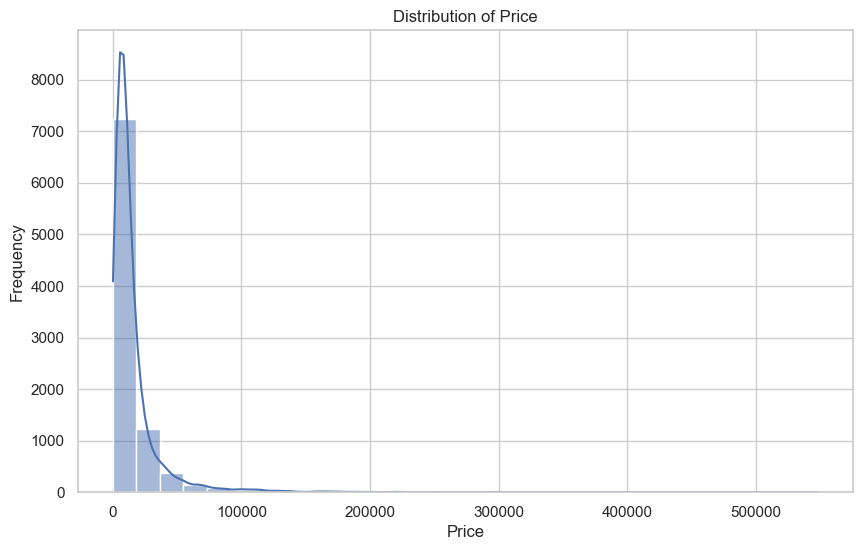

In [204]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True)  # kde=True adds the kernel density estimate
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

The __'price'__ mostly varies between __0 and 80000.__

<a id=section5></a>

In [206]:
# Now we again generate the data profiling report
# save in html file format
profile.to_file("Car Sels Profiling Report Azimy After Preprocessing .html")
profile = ProfileReport(df, title="Car Sels Profiling Report Azimy After Preprocessing")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 5. Conclusion

# Understanding the Dataset

- **Number of rows**: 9576
- **Number of columns**: 10

### Print all the columns in the dataset
- Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'model', 'drive'], dtype='object')

### Show the null values in each attribute or column in the dataset
- car: 0 
- price: 0 
- body: 0 
- mileage: 0 
- engV: 0 
- engType: 0 
- registration: 0 
- year: 0 
- model: 0 
- drive: 511 
- dtype: int64

### Sort the dataset by the price in descending order
- sorted_df = df.sort_values(by='price', ascending=False)

### Find number of duplicate rows in the dataset
- Number of duplicate rows: 112

### Find and Fill missing values
- First, we found the most frequent word used in the drive column, then filled all the null values with it.
- The most frequent value was 'front'.
- df['drive'] = df['drive'].fillna('front')
- df['drive'].isnull().sum()

### Sort according to price (Ascending)
- df = df.sort_values(by='price', ascending=True)

### Group via drive
- grouped = df.groupby('drive')

### Create Dummy Variables
- df = pd.get_dummies(df, columns=['drive'])

### Dropping entries with price <= 0
- df.drop(df[df['price'] <= 0].index, inplace=True)

### Which type of cars are sold the most?
- The type of car sold the most is 'Volkswagen' with 899 sales.

### What is the correlation between price and mileage?
- Correlation between Price and Mileage: -0.31
- This indicates that a negative correlation exists (as price increases, mileage decreases).

### How many cars are registered?
- Number of registered cars: 8668

### Which engine type of cars do users prefer the most?
- 2.0: 1495
